<a href="https://colab.research.google.com/github/ask-kawade/CHD_Prediction_classification/blob/main/CHD_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set maximum columns to be display in datafram as 36
pd.set_option("display.max_columns", 36)
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")

# Setting fontsizes,fontweight,label weight for lebels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import csv file into dataframe
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECTS/Supervised ML- Classification/data_cardiovascular_risk.csv')

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.



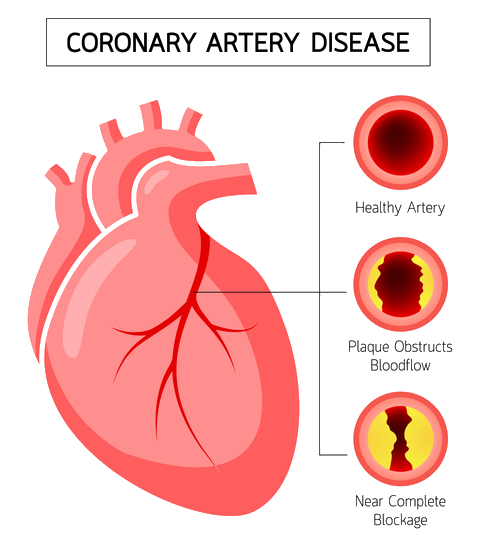




Data Description
Demographic:
* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
Predict variable (desired target)
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [ ]:
# Check total rows and Columns in dataset.
print(f'Total Rows: {df.shape[0]}\nTotal features:{df.shape[1]}')

Total Rows: 3390
Total features:17


In [ ]:
# Check first 5 rows
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# check last 5 rows
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
# Check the statistic summary.
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
# Check data information datatypes,total entries and null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

columns with null values:
* eduacation
* cigsPerDay
* BPMeds
* totChol
* BMI
* heartRate
* glucose


In [ ]:
# drop irrelavant Features
df.drop(['id','education'],inplace=True,axis=1)

In [ ]:
df.duplicated().sum()

0

In [ ]:
len(df)

3390

In [ ]:
missing_value_percent=(df.isna().sum()*100/len(df)).reset_index().rename(columns={0:'%', 'index':'features'})
missing_value_percent

,features,%
0,age,0.000000
1,sex,0.000000
2,is_smoking,0.000000
3,cigsPerDay,0.648968
4,BPMeds,1.297935
5,prevalentStroke,0.000000
6,prevalentHyp,0.000000
7,diabetes,0.000000
8,totChol,1.120944
9,sysBP,0.000000


In [ ]:
# df['cigsPerDay']=df['cigsPerDay'].fillna(df['cigsPerDay'].mode()[0])

In [ ]:
# Imputing NA values with mode. (Handling NULL values)
mode_list=['cigsPerDay','BPMeds','BPMeds','glucose','totChol']
for mode in mode_list:
  df[mode]=df[mode].fillna(df[mode].mode()[0])

In [ ]:
# Checking the imputation
df.isna().sum()

age                 0
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                14
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

In [ ]:
# Checking shape.
df.shape

(3390, 15)

In [ ]:
# Dropping NA values of 'BMI' And 'Glucose' as it has only 14 and 1 NA values respcectively whcih are very less. dropping those will not affect much.
df.dropna(inplace=True)

In [ ]:
# Checking Shape of data after dropping NA values.
df.shape

(3375, 15)

In [ ]:
# Checking NA values.
# successfully handled NA values.
df.isna().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
# Checking value counts of target variable to check imbalance classes.
df['TenYearCHD'].value_counts()

0    2872
1     503
Name: TenYearCHD, dtype: int64

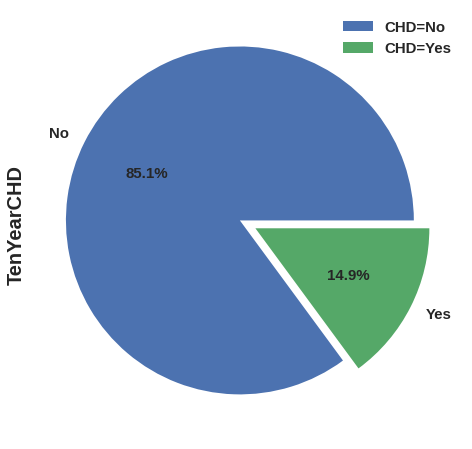

In [ ]:

df['TenYearCHD'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%',figsize=(10,8),fontsize=15,labels=['No','Yes'])
plt.legend(['CHD=No','CHD=Yes'])


taeget variables is has imbalance classes.
We need to use sampling methods to overcome this imbalance of classes.

# Let's Do some Univariate Analysis.

In [ ]:
df.columns

Index(['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

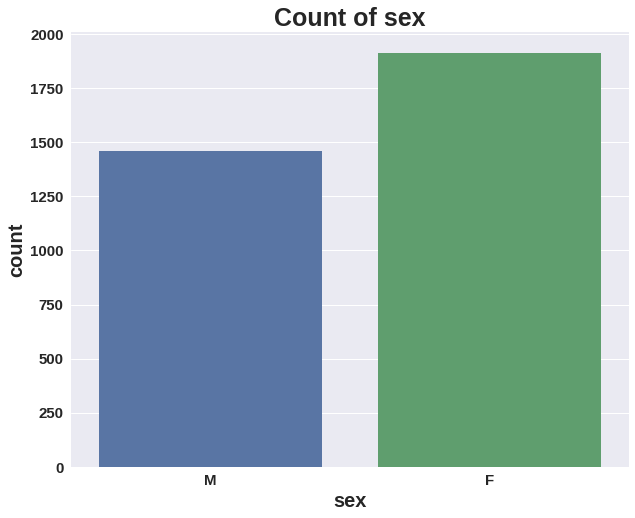

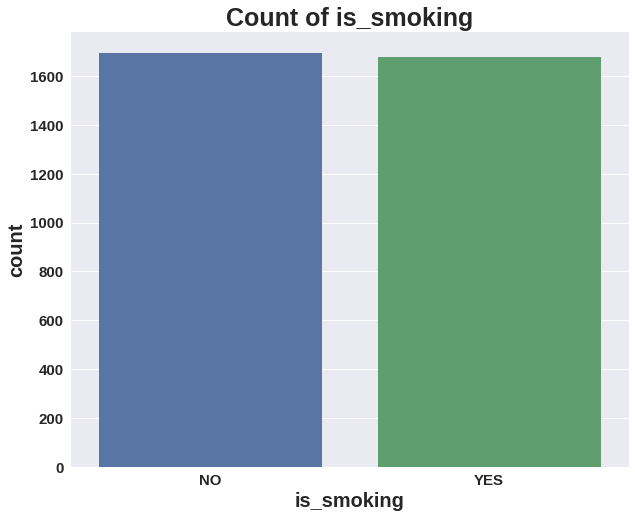

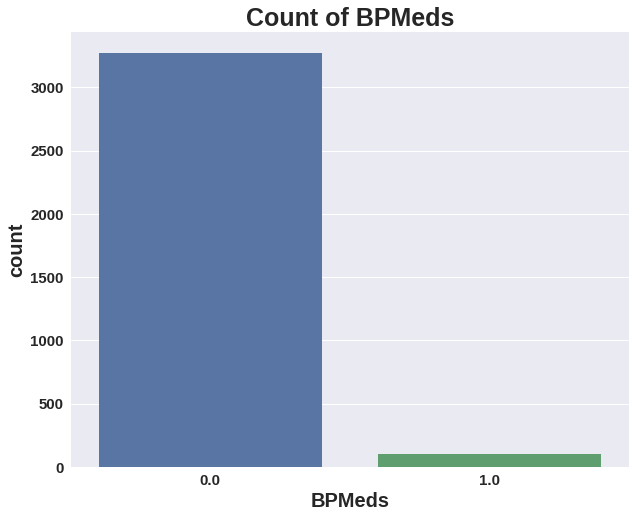

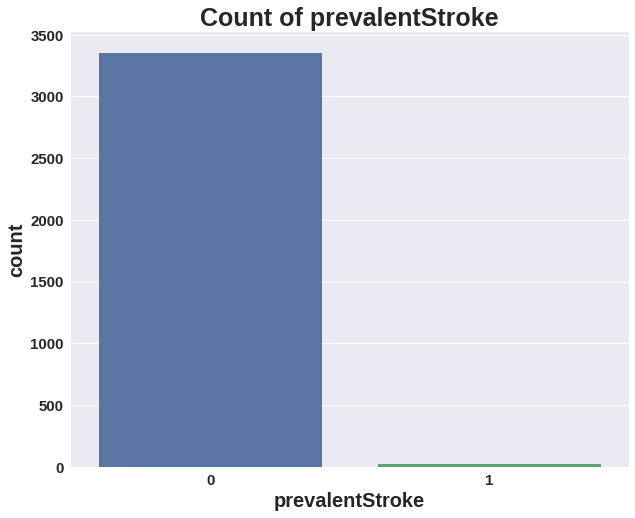

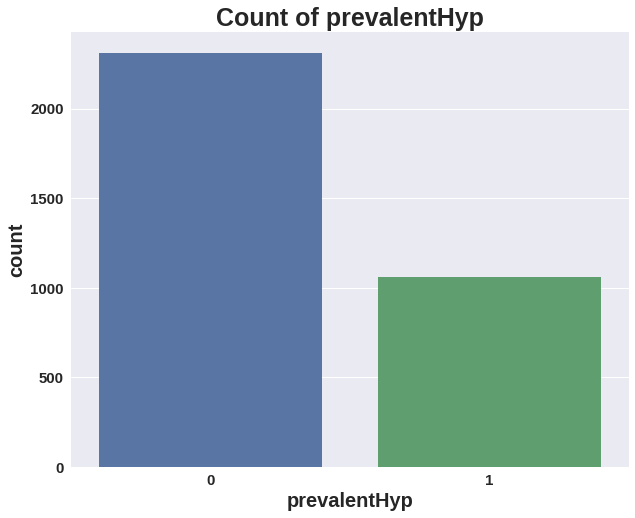

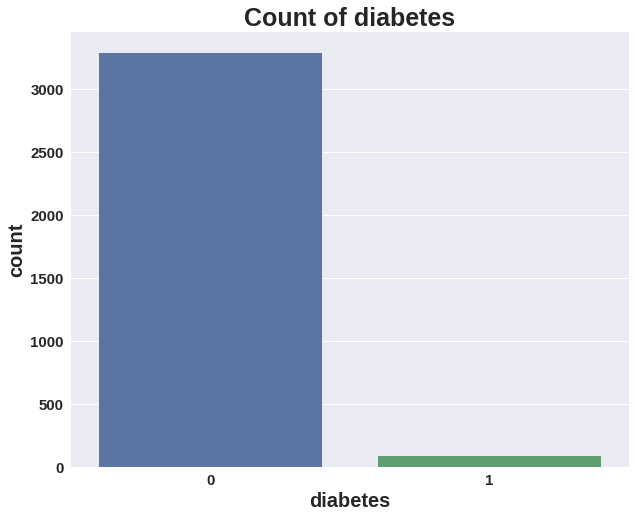

In [ ]:
cat_features=['sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']

for col in cat_features:
  plt.figure(figsize=(10,8))
  sns.countplot(x=df[col])
  plt.title(f'Count of {col}')
  

 

*  Count of female(1914) is slightly higher than the male(1461).
*  Count of smokers and nin smokers is almost equal in our dataset.
* Patients on blood pressure medications are very less which is only 100.
* Patients having prevalent Stroke strokes  are only 20.
* Hypertensive patients are  1062.
* Dibetic patients are only 85.


# Bivarite Analysis

##Lets check the relationship of target variable with independent variables

In [36]:
df.columns

Index(['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
plt.